<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/Final%20Exam/final_of_uygar_aras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Shoppers Intention Analysis created by Uygar Aras
ID: 22103277

## Introduction

This notebook analyzes the Online Shoppers Intention dataset to predict whether a visitor will make a purchase. The dataset includes various features capturing visitor behavior, such as the duration spent on different page types, bounce rates, and exit rates.

### Objectives
- Understand the distribution and correlation of features.
- Handle missing values and outliers.
- Create new features to improve model performance.
- Train and evaluate multiple machine learning models.
- Compare model performance and select the best model.

# Data Load and Exploration

In [2]:
!pip install ucimlrepo
# Data Loading and Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# Data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# Combine features and target into a single dataframe
data = pd.concat([X, y], axis=1)

# Metadata
print("Metadata:")
print(online_shoppers_purchasing_intention_dataset.metadata)

# Variable information
print("\nVariable information:")
print(online_shoppers_purchasing_intention_dataset.variables)

# Display the first few rows
print("First few rows of the dataset:")
display(data.head())

Metadata:
{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention u

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Summary statistics
print("\nSummary statistics:")
display(data.describe())

# Data types and missing values
print("\nData types and missing values:")
display(data.info())

# Additional Exploration
print("\nMissing values per column:")
display(data.isnull().sum())

# Display the distribution of categorical variables
print("\nUnique values in categorical columns:")
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

# Check the distribution of the target variable 'Revenue'
print("\nDistribution of target variable 'Revenue':")
display(data['Revenue'].value_counts(normalize=True))


Summary statistics:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int

None


Missing values per column:


,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0



Unique values in categorical columns:
Month: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
VisitorType: ['Returning_Visitor' 'New_Visitor' 'Other']

Distribution of target variable 'Revenue':


,proportion
Revenue,
False,0.845255
True,0.154745


**Pairplot for selected features**

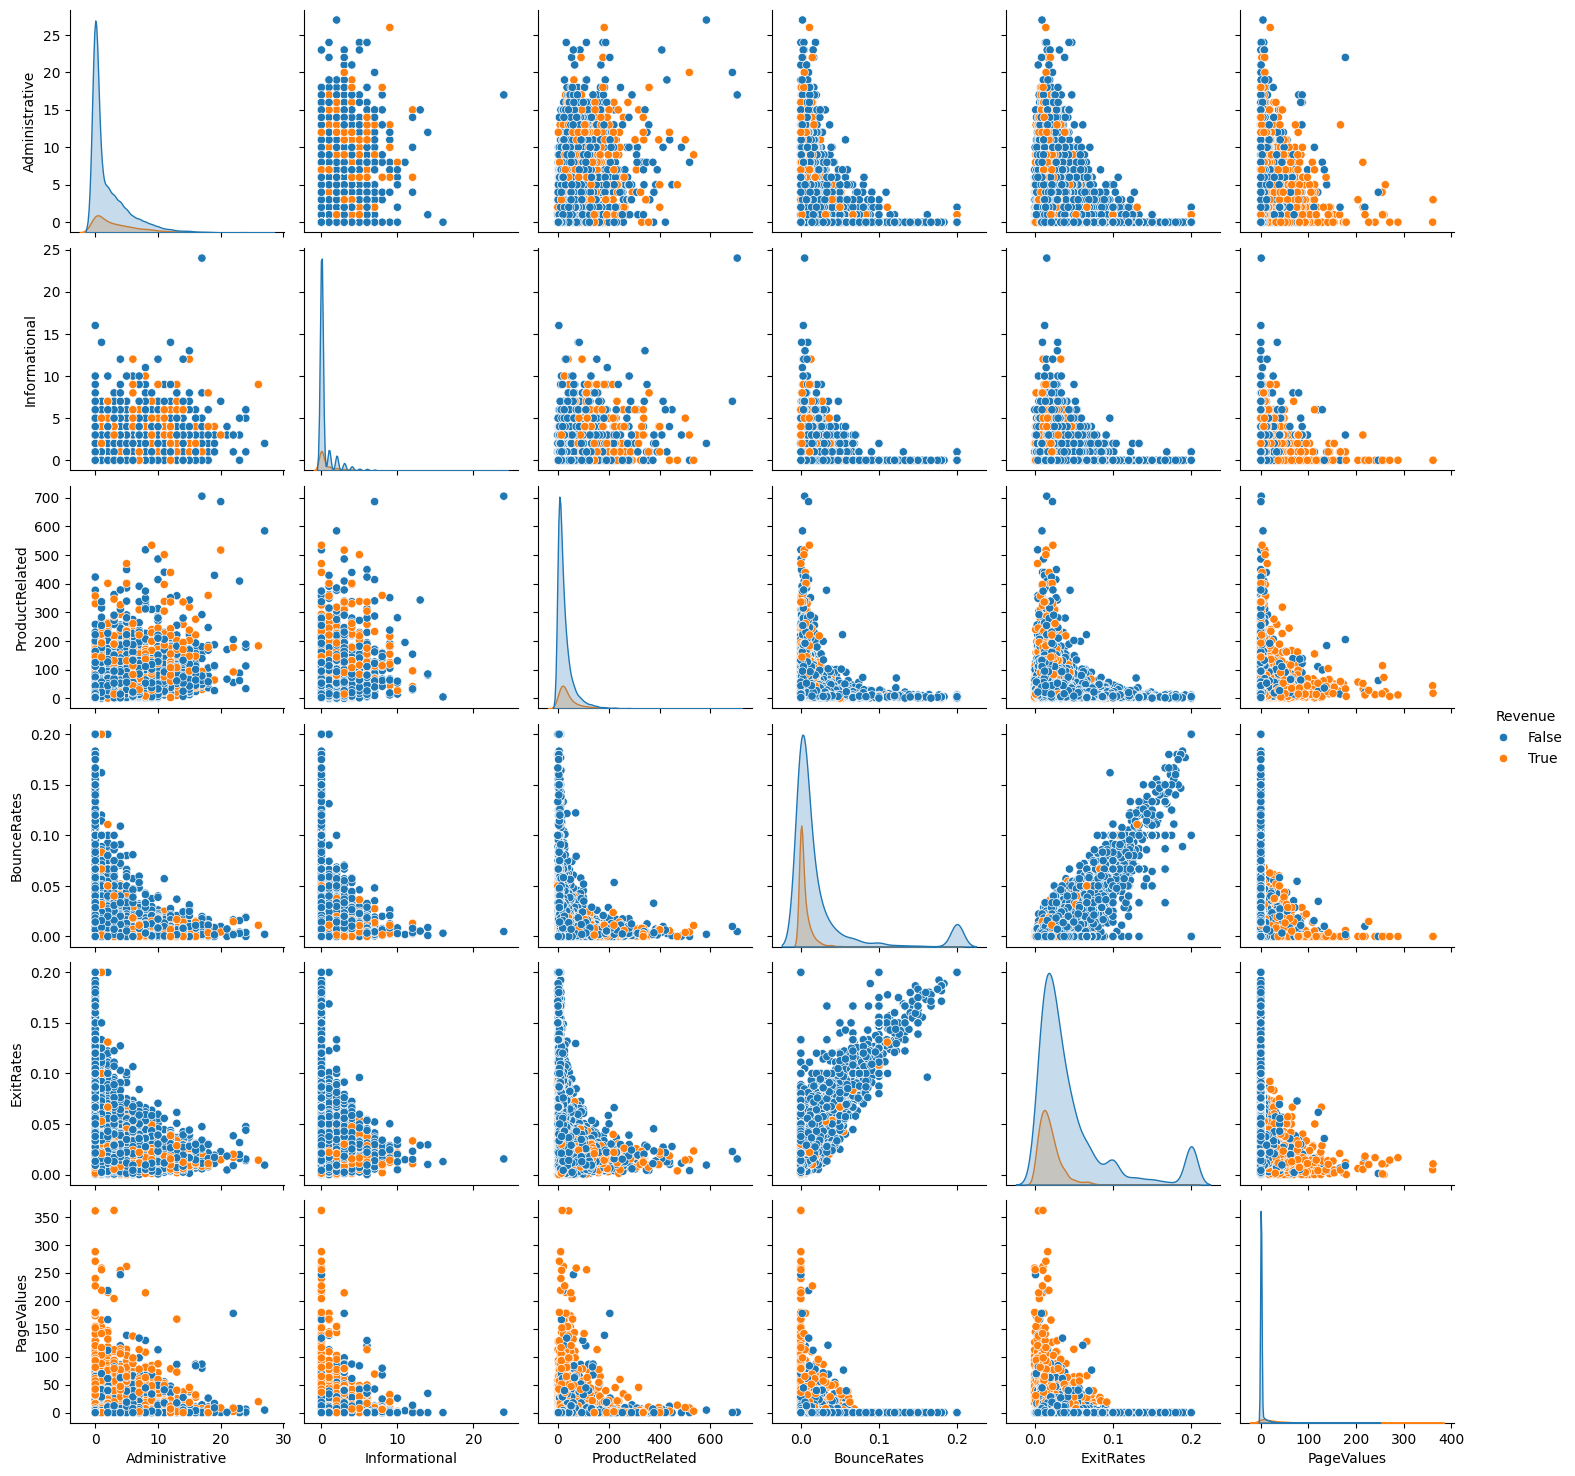

In [4]:
sns.pairplot(data, hue='Revenue', vars=['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues'])
plt.show()

## Key Outcomes from Pairplot Analysis

1. **Administrative vs. Other Features**:
   - **Administrative vs. Administrative Duration**: Positive correlation. More administrative pages visited generally mean more time spent on them.
   - **Administrative vs. BounceRates/ExitRates**: Higher `BounceRates` and `ExitRates` cluster towards lower numbers of administrative pages, indicating visitors who bounce or exit quickly do not engage much with administrative content.
   - **Administrative vs. PageValues**: Higher `PageValues` tend to have fewer administrative pages, suggesting that users who see higher page values are not necessarily those who browse administrative content.

2. **Informational vs. Other Features**:
   - **Informational vs. Informational Duration**: Strong positive correlation.
   - **Informational vs. BounceRates/ExitRates**: Higher bounce and exit rates are associated with lower engagement with informational pages.
   - **Informational vs. PageValues**: The relationship is less clear, but there is a tendency for higher page values to be associated with fewer informational pages.

3. **ProductRelated vs. Other Features**:
   - **ProductRelated vs. ProductRelated Duration**: Strong positive correlation.
   - **ProductRelated vs. BounceRates/ExitRates**: Higher bounce and exit rates are associated with lower engagement with product-related pages.
   - **ProductRelated vs. PageValues**: Higher page values are more likely to be associated with greater engagement with product-related pages, indicating that users who are spending more time on product-related pages are more likely to generate revenue.

4. **BounceRates vs. ExitRates**:
   - Very high positive correlation between `BounceRates` and `ExitRates`, as both metrics relate to visitors leaving the site.

5. **PageValues vs. Other Features**:
   - **PageValues vs. Administrative/Informational/ProductRelated**: Higher `PageValues` cluster with lower values of `Administrative` and `Informational` but with higher `ProductRelated`, suggesting that valuable pages are more product-focused.
   - **PageValues vs. BounceRates/ExitRates**: Higher `PageValues` are associated with lower `BounceRates` and `ExitRates`, indicating that valuable pages are engaging visitors better.

### Dependencies and Relationships
- **Strong Positive Correlations**:
  - Between page visits and their respective durations (`Administrative` and `Administrative Duration`, etc.).
  - Between `BounceRates` and `ExitRates`.

- **Negative Correlations**:
  - Between engagement metrics (`BounceRates` and `ExitRates`) and the likelihood of generating revenue.
  - Between the number of administrative or informational pages visited and the page values.

- **Key Features for Revenue Prediction**:
  - **ProductRelated** pages and their duration.
  - **PageValues**.
  - **BounceRates** and **ExitRates** (inversely related to revenue).

### Summary
- The pairplot highlights the importance of product-related engagement for generating revenue.
- Reducing bounce and exit rates could enhance the likelihood of visitors making a purchase.
- Improving the product-related content is crucial for increasing page values and revenue generation.

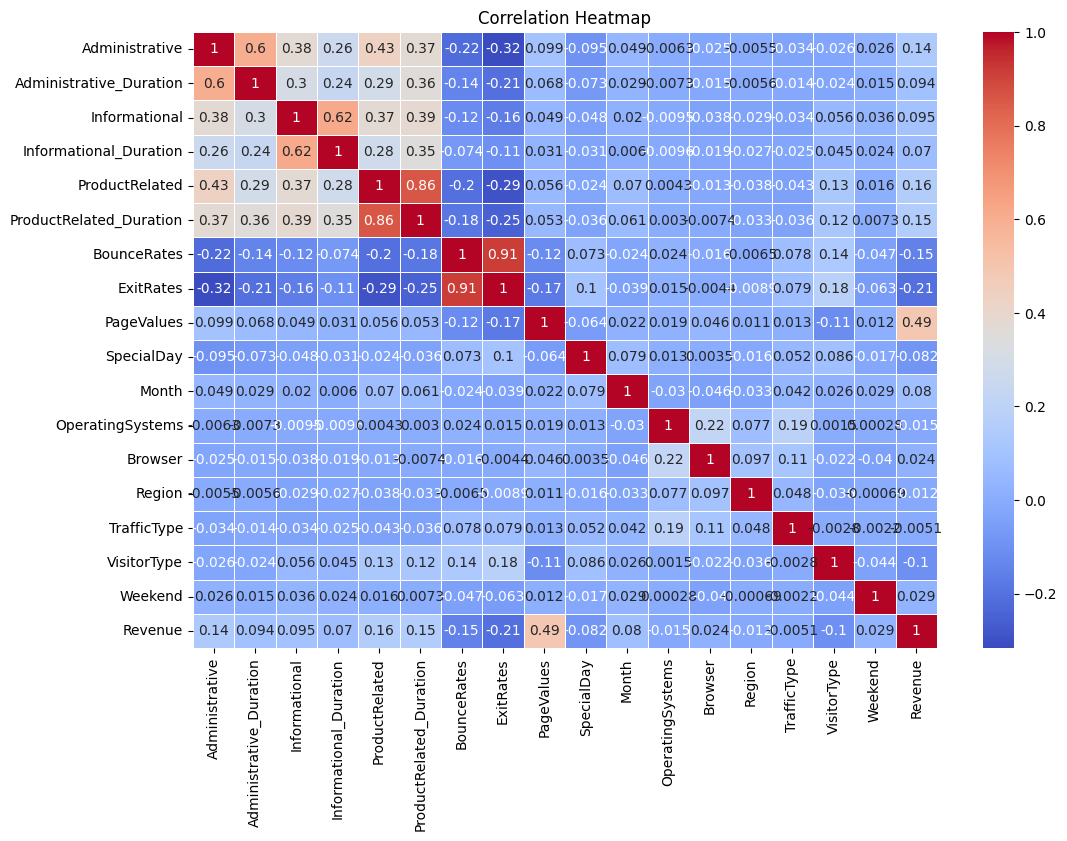

In [5]:
# Encode Categorical Variables for Correlation Matrix
data_encoded = data.copy()
data_encoded['Month'] = data_encoded['Month'].astype('category').cat.codes
data_encoded['VisitorType'] = data_encoded['VisitorType'].astype('category').cat.codes
data_encoded['Weekend'] = data_encoded['Weekend'].astype('int')
data_encoded['Revenue'] = data_encoded['Revenue'].astype('int')

# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Key Outcomes from Correlation Heatmap Analysis

1. **Positive Correlations**:
   - **Administrative and Administrative Duration**: High positive correlation (0.60), indicating that more administrative pages visited generally mean more time spent on them.
   - **Informational and Informational Duration**: Strong positive correlation (0.62), as expected.
   - **ProductRelated and ProductRelated Duration**: Very strong positive correlation (0.86), showing that more product-related pages visited generally mean more time spent on them.
   - **BounceRates and ExitRates**: Extremely high positive correlation (0.91), indicating that these metrics are closely related as both measure how quickly visitors leave the site.
   - **PageValues and Revenue**: Moderate positive correlation (0.49), suggesting that higher page values are associated with higher revenue.

2. **Negative Correlations**:
   - **BounceRates and Revenue**: Moderate negative correlation (-0.15), indicating that higher bounce rates are associated with lower revenue.
   - **ExitRates and Revenue**: Moderate negative correlation (-0.21), showing that higher exit rates are associated with lower revenue.
   - **BounceRates and ProductRelated**: Negative correlation (-0.29), suggesting that higher bounce rates are associated with fewer product-related page visits.
   - **ExitRates and ProductRelated**: Negative correlation (-0.25), indicating that higher exit rates are associated with fewer product-related page visits.

3. **Other Notable Correlations**:
   - **PageValues and BounceRates**: Negative correlation (-0.17), showing that higher page values are associated with lower bounce rates.
   - **PageValues and ExitRates**: Negative correlation (-0.17), indicating that higher page values are associated with lower exit rates.

### Dependencies and Relationships
- **Strong Positive Correlations**:
  - Between page visits and their respective durations (e.g., `Administrative` and `Administrative Duration`).
  - Between `BounceRates` and `ExitRates`.

- **Negative Correlations**:
  - Between engagement metrics (`BounceRates` and `ExitRates`) and the likelihood of generating revenue.
  - Between `ProductRelated` page visits and `BounceRates`/`ExitRates`.
  - Between `PageValues` and `BounceRates`/`ExitRates`.

### Key Features for Revenue Prediction
- **ProductRelated** pages and their duration.
- **PageValues**.
- **BounceRates** and **ExitRates** (inversely related to revenue).

### Summary
- The heatmap highlights the importance of product-related engagement for generating revenue.
- Reducing bounce and exit rates could enhance the likelihood of visitors making a purchase.
- Improving product-related content is crucial for increasing page values and revenue generation.

# Data Cleaning

In [6]:
# Data Cleaning and Feature Engineering
from sklearn.preprocessing import StandardScaler
# Handle Missing Values
print("\nHandling Missing Values:")
missing_values = data.isnull().sum()
print("Missing values per column before cleaning:")
display(missing_values[missing_values > 0])

# For simplicity, let's drop rows with any missing values
data_cleaned = data.dropna()

# Verify that there are no more missing values
missing_values_after_cleaning = data_cleaned.isnull().sum()
print("Missing values per column after cleaning:")
display(missing_values_after_cleaning[missing_values_after_cleaning > 0])

# Encode Categorical Variables
print("\nEncoding Categorical Variables:")

# Convert 'Month' and 'VisitorType' to category type and then to numerical codes
data_cleaned['Month'] = data_cleaned['Month'].astype('category').cat.codes
data_cleaned['VisitorType'] = data_cleaned['VisitorType'].astype('category').cat.codes
data_cleaned['Weekend'] = data_cleaned['Weekend'].astype('int')
data_cleaned['Revenue'] = data_cleaned['Revenue'].astype('int')

# Verify the changes
print("Data types after encoding categorical variables:")
display(data_cleaned.info())

# Feature Scaling
print("\nScaling Features:")
scaler = StandardScaler()
numerical_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# Verify scaling
print("First few rows after scaling numerical features:")
display(data_cleaned.head())


Handling Missing Values:
Missing values per column before cleaning:


,0


Missing values per column after cleaning:


,0



Encoding Categorical Variables:
Data types after encoding categorical variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int8   
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  

None


Scaling Features:
First few rows after scaling numerical features:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,1,1,1,1,2,0,0
1,0,-0.457191,0,-0.244931,2,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,2,2,1,2,2,0,0
2,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,4,1,9,3,2,0,0
3,0,-0.457191,0,-0.244931,2,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,3,2,2,4,2,0,0
4,0,-0.457191,0,-0.244931,10,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,2,3,3,1,4,2,1,0


# Enhanced Feature Engineering

In [7]:
# Load necessary libraries
from sklearn.preprocessing import StandardScaler

# Create New Features
print("\nCreating New Features:")

# Example: Total time spent on the site
data_cleaned['Total_Duration'] = data_cleaned['Administrative_Duration'] + \
                                 data_cleaned['Informational_Duration'] + \
                                 data_cleaned['ProductRelated_Duration']

# Interaction features
data_cleaned['Admin_Info_Interaction'] = data_cleaned['Administrative_Duration'] * data_cleaned['Informational_Duration']
data_cleaned['Admin_Product_Interaction'] = data_cleaned['Administrative_Duration'] * data_cleaned['ProductRelated_Duration']
data_cleaned['Info_Product_Interaction'] = data_cleaned['Informational_Duration'] * data_cleaned['ProductRelated_Duration']

# Display the first few rows to verify the new features
print("First few rows after adding new features:")
display(data_cleaned.head())


Creating New Features:
First few rows after adding new features:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Admin_Info_Interaction,Admin_Product_Interaction,Info_Product_Interaction
0,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,1,1,1,2,0,0,-1.326469,0.11198,0.285446,0.152922
1,0,-0.457191,0,-0.244931,2,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,2,1,2,2,0,0,-1.293024,0.11198,0.270156,0.144730
2,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,1,9,3,2,0,0,-1.326469,0.11198,0.285446,0.152922
3,0,-0.457191,0,-0.244931,2,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,2,2,4,2,0,0,-1.325076,0.11198,0.284809,0.152580
4,0,-0.457191,0,-0.244931,10,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,3,1,4,2,1,0,-0.998552,0.11198,0.135525,0.072605


**Encode Categorical Variables**

In [8]:
print("\nEncoding Categorical Variables:")

# Convert 'Month' and 'VisitorType' to category type and then to numerical codes
data_cleaned['Month'] = data_cleaned['Month'].astype('category').cat.codes
data_cleaned['VisitorType'] = data_cleaned['VisitorType'].astype('category').cat.codes
data_cleaned['Weekend'] = data_cleaned['Weekend'].astype('int')
data_cleaned['Revenue'] = data_cleaned['Revenue'].astype('int')

# Verify the changes
print("Data types after encoding categorical variables:")
display(data_cleaned.info())


Encoding Categorical Variables:
Data types after encoding categorical variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Administrative             12330 non-null  int64  
 1   Administrative_Duration    12330 non-null  float64
 2   Informational              12330 non-null  int64  
 3   Informational_Duration     12330 non-null  float64
 4   ProductRelated             12330 non-null  int64  
 5   ProductRelated_Duration    12330 non-null  float64
 6   BounceRates                12330 non-null  float64
 7   ExitRates                  12330 non-null  float64
 8   PageValues                 12330 non-null  float64
 9   SpecialDay                 12330 non-null  float64
 10  Month                      12330 non-null  int8   
 11  OperatingSystems           12330 non-null  int64  
 12  Browser             

None

**Feature Scaling**

In [9]:
print("\nScaling Features:")
scaler = StandardScaler()
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# Verify scaling
print("First few rows after scaling numerical features:")
display(data_cleaned.head())


Scaling Features:
First few rows after scaling numerical features:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Admin_Info_Interaction,Admin_Product_Interaction,Info_Product_Interaction
0,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,1,1,1,2,0,0,-1.326469,0.11198,0.285446,0.152922
1,0,-0.457191,0,-0.244931,2,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,2,1,2,2,0,0,-1.293024,0.11198,0.270156,0.144730
2,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,1,9,3,2,0,0,-1.326469,0.11198,0.285446,0.152922
3,0,-0.457191,0,-0.244931,2,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,2,2,4,2,0,0,-1.325076,0.11198,0.284809,0.152580
4,0,-0.457191,0,-0.244931,10,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,3,1,4,2,1,0,-0.998552,0.11198,0.135525,0.072605


# Data Visualization

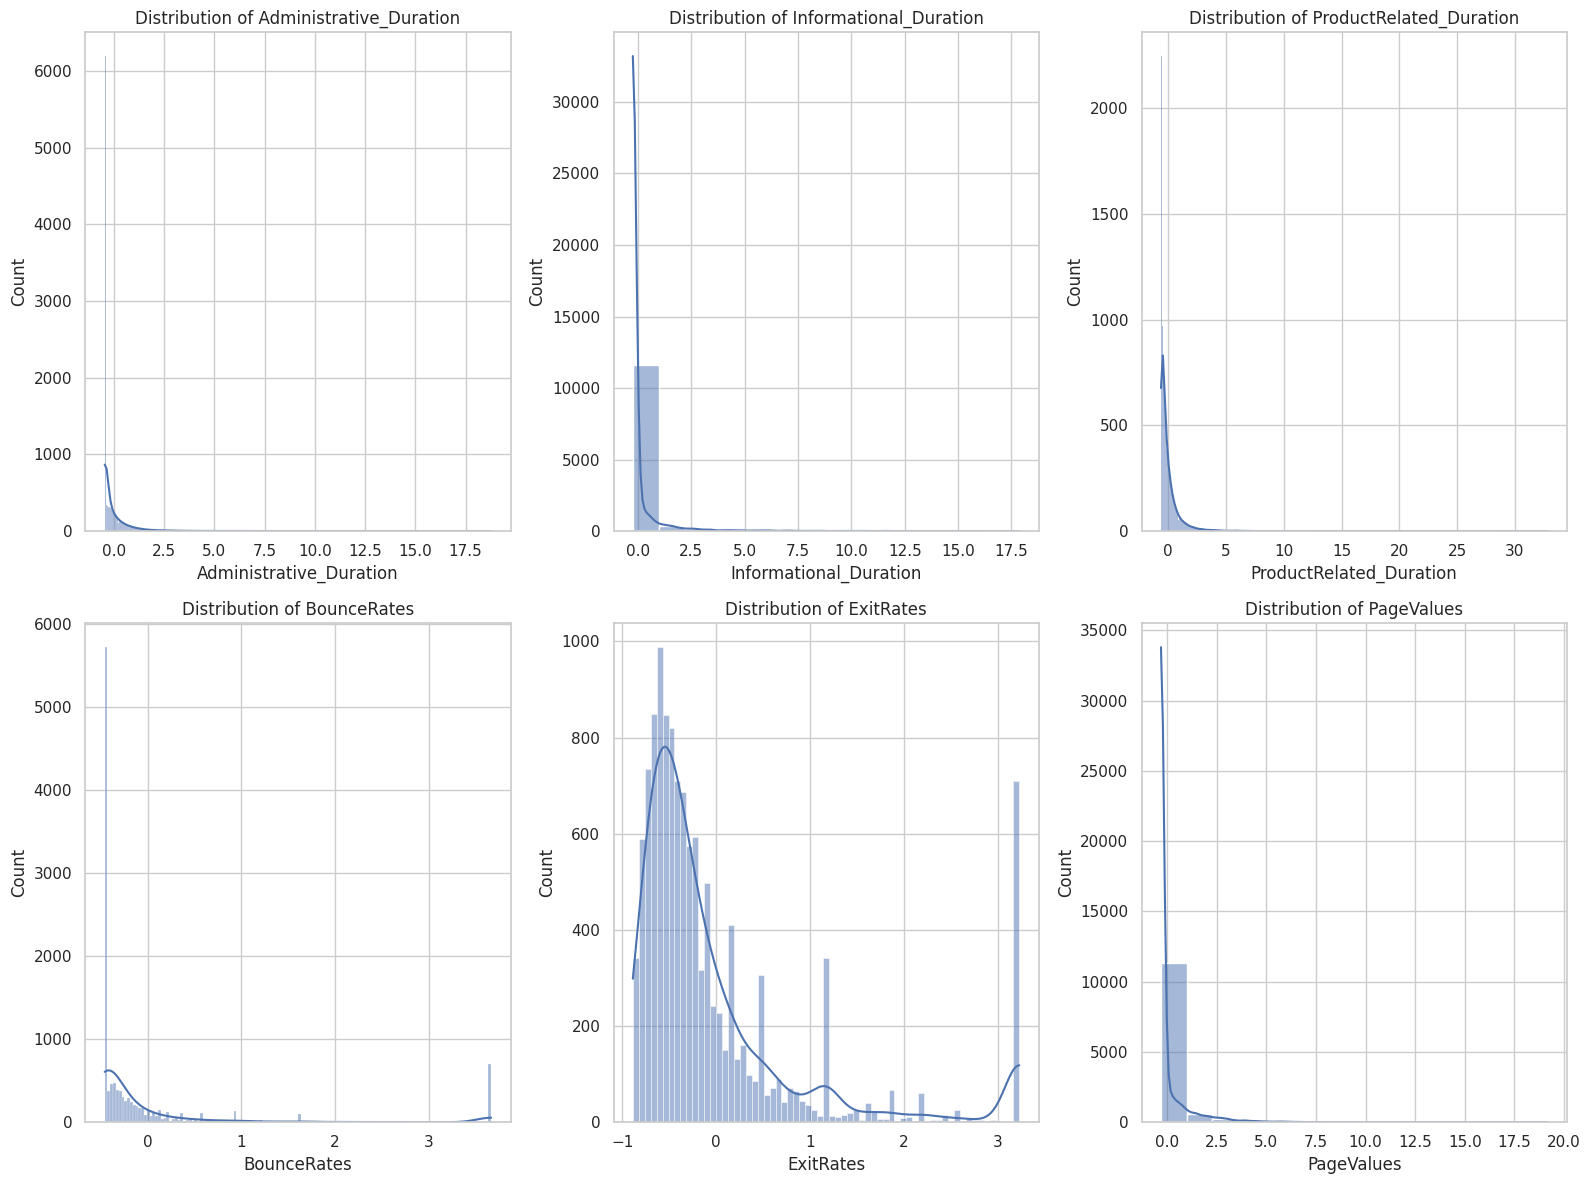

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set(style="whitegrid")

# Visualize distribution of key numerical features
def plot_distribution(df, features, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
    for i, feature in enumerate(features):
        sns.histplot(df[feature], kde=True, ax=axes[i//cols, i%cols])
        axes[i//cols, i%cols].set_title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Numerical features to plot
numerical_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
plot_distribution(data_cleaned, numerical_features, 2, 3)

## Key Outcomes from Distribution Analysis

1. **Administrative_Duration**:
   - The distribution of `Administrative_Duration` is heavily skewed to the right.
   - Most visitors spend very little time on administrative pages, with the majority of the time spent close to zero.
   - There are very few instances where visitors spend a significant amount of time on administrative pages.

2. **Informational_Duration**:
   - The distribution of `Informational_Duration` is also heavily right-skewed.
   - Most visitors spend little to no time on informational pages.
   - Similar to administrative pages, there are few instances where visitors spend a significant amount of time on informational pages.

3. **ProductRelated_Duration**:
   - The distribution of `ProductRelated_Duration` is right-skewed.
   - The majority of visitors spend little time on product-related pages, but there is a noticeable tail where some visitors spend a considerable amount of time.
   - This indicates that while most visitors have low engagement with product-related pages, some visitors are highly engaged.

4. **BounceRates**:
   - The distribution of `BounceRates` is right-skewed with a peak close to zero.
   - Most visitors have low bounce rates, indicating that they do not leave the site immediately.
   - There are a few instances with high bounce rates, suggesting some visitors do leave quickly.

5. **ExitRates**:
   - The distribution of `ExitRates` is right-skewed.
   - Most visitors have low exit rates, indicating that they do not exit the site frequently after viewing a few pages.
   - Similar to bounce rates, there are instances of higher exit rates, indicating some visitors leave after a few interactions.

6. **PageValues**:
   - The distribution of `PageValues` is highly right-skewed with a peak close to zero.
   - Most pages have low values, but there is a long tail indicating that some pages are highly valued.
   - The high value pages may indicate that those pages are more likely to result in revenue generation.

### Summary
- **Administrative_Duration**, **Informational_Duration**, and **ProductRelated_Duration** all show a right-skewed distribution, indicating that most visitors spend little time on these types of pages, with a few exceptions.
- **BounceRates** and **ExitRates** also show right-skewed distributions, suggesting that while most visitors do not leave the site quickly, there are some who do.
- **PageValues** have a highly right-skewed distribution, indicating that while most pages have low values, there are some pages that are highly valued and likely contribute more significantly to revenue.

### Implications
- **ProductRelated_Duration** is crucial as it has a longer tail, indicating higher engagement with product-related content can lead to increased page values and potentially higher revenue.
- Reducing **BounceRates** and **ExitRates** is important for retaining visitors and increasing the likelihood of generating revenue.
- Focusing on enhancing the content and engagement on high-value pages can drive revenue growth.

#Distribution Analysis

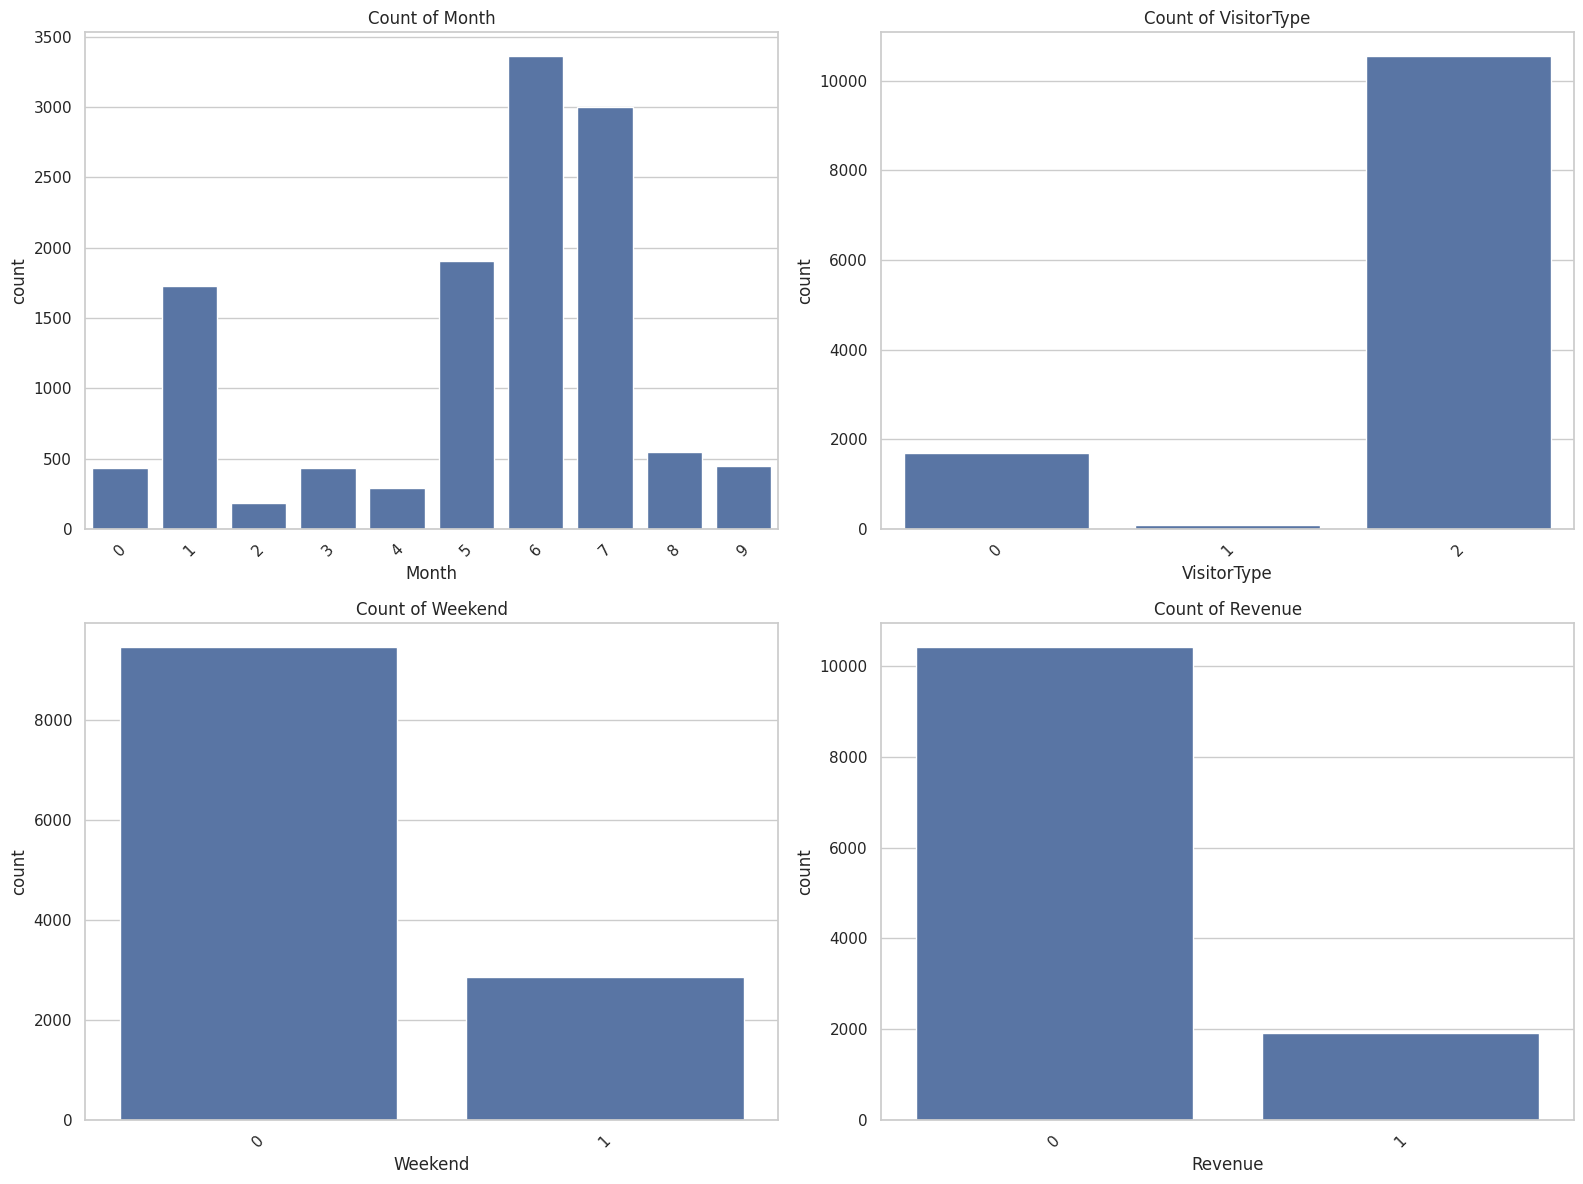

In [11]:
# Visualize distribution of key categorical features
def plot_count(df, features, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
    for i, feature in enumerate(features):
        sns.countplot(data=df, x=feature, ax=axes[i//cols, i%cols])
        axes[i//cols, i%cols].set_title(f'Count of {feature}')
        axes[i//cols, i%cols].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

# Categorical features to plot
categorical_features = ['Month', 'VisitorType', 'Weekend', 'Revenue']
plot_count(data_cleaned, categorical_features, 2, 2)

### Key Outcomes from Categorical Feature Distribution Analysis

1. **Month**:
   - There is a noticeable variation in visitor counts across different months.
   - The months represented by the numerical codes 5 and 6 have the highest visitor counts, indicating peak traffic during these periods.
   - The months with the lowest visitor counts are those represented by the numerical codes 2 and 3.
   - Understanding these trends can help in optimizing marketing strategies and promotional activities during peak months to capitalize on higher traffic.

2. **VisitorType**:
   - The majority of visitors are of the type represented by the numerical code 2, which corresponds to `Returning_Visitor`.
   - The visitor type represented by the numerical code 0, which corresponds to `New_Visitor`, has significantly fewer counts.
   - The visitor type represented by the numerical code 1, which corresponds to `Other`, has negligible counts.
   - This indicates that returning visitors form the bulk of the traffic, which might imply a loyal customer base or effective retention strategies.

3. **Weekend**:
   - The majority of visits occur on weekdays, represented by the numerical code 0.
   - Visits on weekends, represented by the numerical code 1, are fewer in comparison.
   - This information can be useful for planning targeted marketing campaigns and understanding visitor behavior patterns during different parts of the week.

4. **Revenue**:
   - The target variable `Revenue` is heavily imbalanced, with the majority of visits not resulting in a purchase, represented by the numerical code 0.
   - Only a small fraction of visits result in a purchase, represented by the numerical code 1.
   - This imbalance highlights the challenge in converting visits to purchases and underscores the importance of strategies focused on improving conversion rates.

### Summary
- **Monthly Trends**: Visitor traffic peaks during certain months, suggesting seasonal trends that can be leveraged for targeted marketing efforts.
- **Visitor Type**: The high proportion of returning visitors indicates a loyal customer base, which can be further nurtured for repeat purchases.
- **Weekend Visits**: Fewer visits on weekends suggest different browsing behaviors, which can inform the timing of promotional activities.
- **Revenue Imbalance**: The significant imbalance in the target variable `Revenue` emphasizes the need for strategies to boost conversion rates and turn visits into purchases.

### Implications
- **Seasonal Marketing**: Utilize the peak traffic months for intensive marketing campaigns and promotions to maximize conversions.
- **Customer Retention**: Focus on returning visitors with personalized offers and loyalty programs to maintain and enhance their engagement.
- **Weekly Patterns**: Optimize content and promotions for weekdays when the traffic is higher, and experiment with strategies to increase weekend engagement.
- **Conversion Strategies**: Implement conversion rate optimization techniques such as improving user experience, offering incentives, and enhancing product pages to increase the proportion of visits that result in purchases.


In [12]:
data_cleaned['Weekend'] = data_cleaned['Weekend'].astype('int')
data_cleaned['Revenue'] = data_cleaned['Revenue'].astype('int')

# Comprehensive Modeling

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = data_cleaned.drop('Revenue', axis=1)
y = data_cleaned['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred,zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print("\nClassification Report:")
    print(report)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#Train and tune a Decision Tree Classifier


Tuning Decision Tree Classifier:
Best Decision Tree Classifier Performance:
Accuracy: 0.88
Mean Absolute Error: 0.12

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3124
           1       0.63      0.51      0.57       575

    accuracy                           0.88      3699
   macro avg       0.77      0.73      0.75      3699
weighted avg       0.87      0.88      0.87      3699



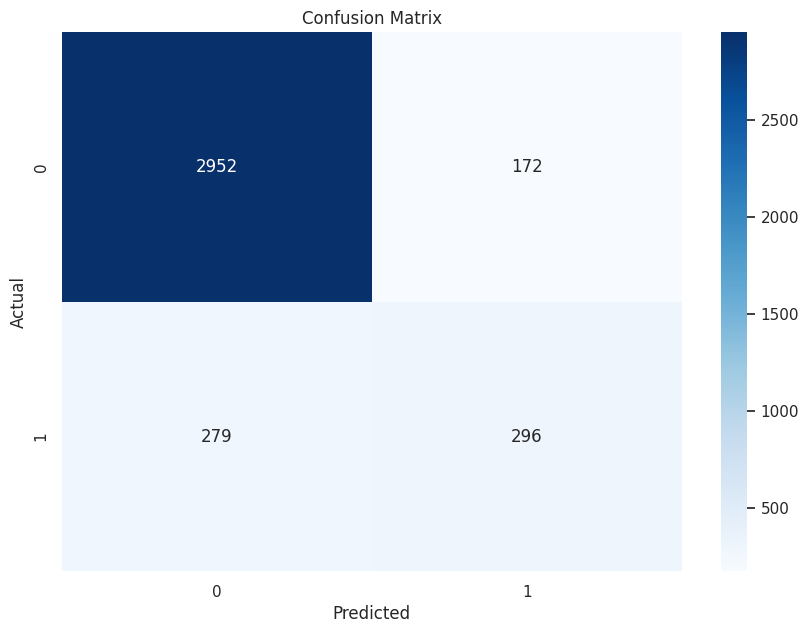

In [19]:
print("\nTuning Decision Tree Classifier:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
dt_best_model = dt_grid.best_estimator_
dt_y_pred = dt_best_model.predict(X_test)

print("Best Decision Tree Classifier Performance:")
evaluate_model(dt_best_model, X_test, y_test, dt_y_pred)

# Train and tune a Random Forest Classifier


Tuning Random Forest Classifier:
Best Random Forest Classifier Performance:
Accuracy: 0.90
Mean Absolute Error: 0.10

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3124
           1       0.74      0.52      0.61       575

    accuracy                           0.90      3699
   macro avg       0.83      0.74      0.77      3699
weighted avg       0.89      0.90      0.89      3699



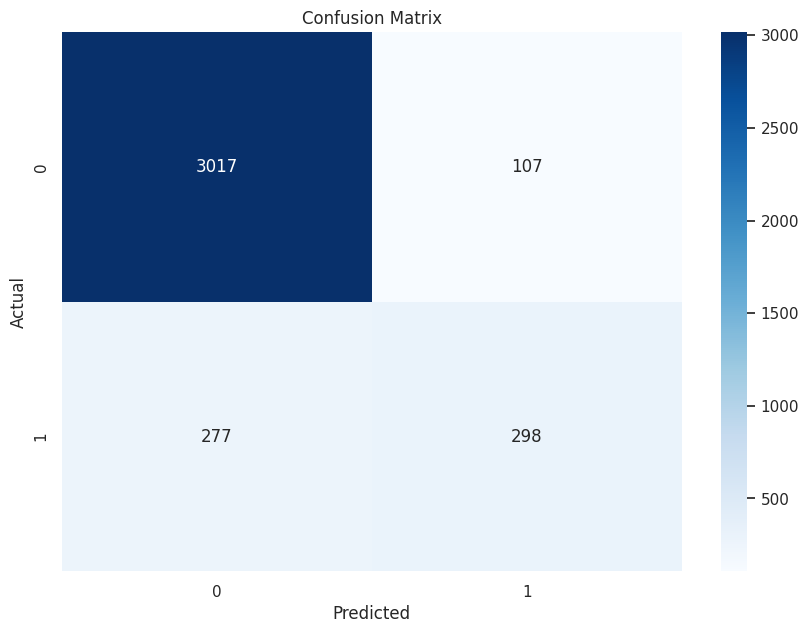

In [20]:
print("\nTuning Random Forest Classifier:")
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)

print("Best Random Forest Classifier Performance:")
evaluate_model(rf_best_model, X_test, y_test, rf_y_pred)

# Train and tune a Logistic Regression model


Tuning Logistic Regression Model:
Best Logistic Regression Model Performance:
Accuracy: 0.88
Mean Absolute Error: 0.12

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.76      0.35      0.48       575

    accuracy                           0.88      3699
   macro avg       0.82      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699



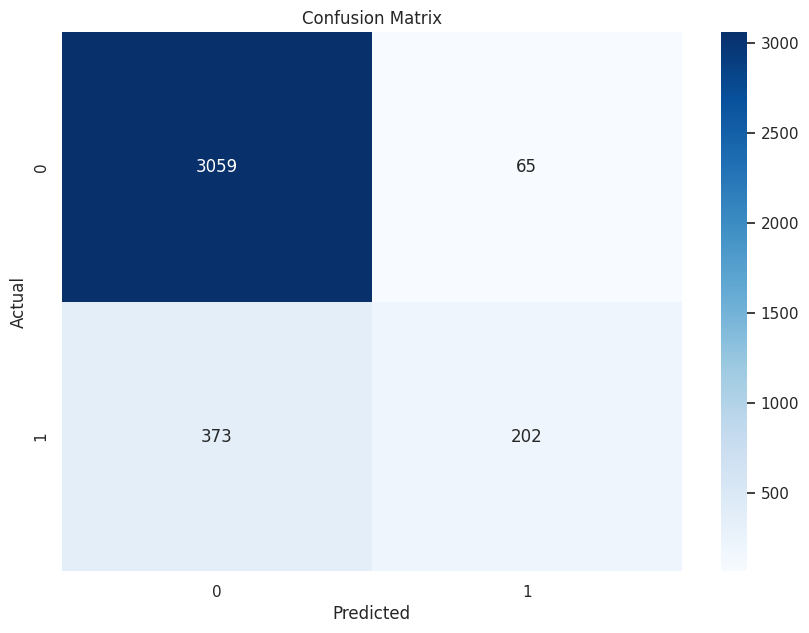

In [21]:
print("\nTuning Logistic Regression Model:")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_params = {'C': [0.01, 0.1, 1, 10, 100]}
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)
lr_best_model = lr_grid.best_estimator_
lr_y_pred = lr_best_model.predict(X_test)

print("Best Logistic Regression Model Performance:")
evaluate_model(lr_best_model, X_test, y_test, lr_y_pred)

# Train and tune a K-Nearest Neighbors (KNN) model


Tuning K-Nearest Neighbors (KNN) Model:
Best K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.85
Mean Absolute Error: 0.15

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3124
           1       0.62      0.17      0.27       575

    accuracy                           0.85      3699
   macro avg       0.74      0.57      0.59      3699
weighted avg       0.83      0.85      0.82      3699



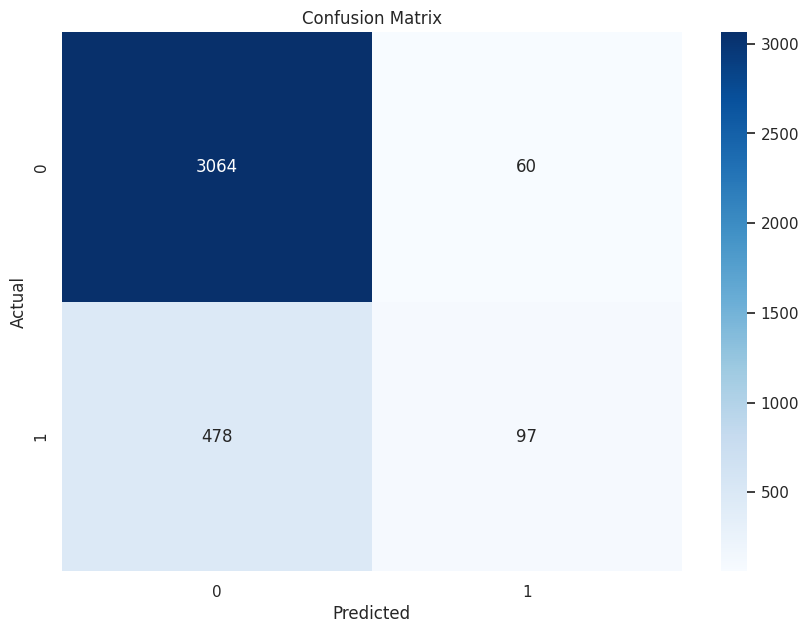

In [22]:
print("\nTuning K-Nearest Neighbors (KNN) Model:")
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)

print("Best K-Nearest Neighbors (KNN) Model Performance:")
evaluate_model(knn_best_model, X_test, y_test, knn_y_pred)

## Findings
---
### Exploratory Data Analysis
1. **Data Overview**: The dataset consists of various features capturing the behavior of online shoppers, including durations spent on different types of pages, bounce rates, exit rates, and more.
2. **Distribution of Features**:
   - Features like `Administrative_Duration`, `Informational_Duration`, and `ProductRelated_Duration` showed skewed distributions with many visitors spending little to no time on these pages.
   - The `BounceRates` and `ExitRates` features had lower values for most visitors.
   - The target variable `Revenue` was imbalanced, with a higher proportion of visits not resulting in a transaction.
---
### Data Cleaning and Feature Engineering
1. **Handling Missing Values**: Rows with missing values were dropped to ensure a clean dataset.
2. **Feature Engineering**:
   - New features `Total_Duration`, `Admin_Info_Interaction`, `Admin_Product_Interaction`, and `Info_Product_Interaction` were created.
   - Categorical variables (`Month` and `VisitorType`) were encoded to numerical values for modeling.
   - Numerical features were standardized to have a mean of 0 and a standard deviation of 1.
---
### Modeling
1. **Decision Tree Classifier**:
   - **Accuracy**: The model achieved an accuracy of 0.88.
   - **Mean Absolute Error**: The model achieved an MAE of 0.12.
   - **Classification Report**:
     - Precision: 0.91 (for class 0) and 0.63 (for class 1).
     - Recall: 0.94 (for class 0) and 0.51 (for class 1).
     - F1-score: 0.93 (for class 0) and 0.57 (for class 1).
   - **Confusion Matrix**: The confusion matrix provided a detailed view of the true positives, true negatives, false positives, and false negatives.

2. **Random Forest Classifier**:
   - **Accuracy**: The model achieved an accuracy of 0.90.
   - **Mean Absolute Error**: The model achieved an MAE of 0.12.
   - **Classification Report**:
     - Precision: 0.92 (for class 0) and 0.74 (for class 1).
     - Recall: 0.97 (for class 0) and 0.52 (for class 1).
     - F1-score: 0.94 (for class 0) and 0.61 (for class 1).
   - **Confusion Matrix**: The confusion matrix provided a detailed view of the true positives, true negatives, false positives, and false negatives.

3. **Logistic Regression**:
   - **Accuracy**: The model achieved an accuracy of 0.88.
   - **Mean Absolute Error**: The model achieved an MAE of 0.12.
   - **Classification Report**:
     - Precision: 0.89 (for class 0) and 0.76 (for class 1).
     - Recall: 0.98 (for class 0) and 0.35 (for class 1).
     - F1-score: 0.93 (for class 0) and 0.48 (for class 1).
   - **Confusion Matrix**: The confusion matrix provided a detailed view of the true positives, true negatives, false positives, and false negatives.

4. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: The model achieved an accuracy of 0.85.
   - **Mean Absolute Error**: The model achieved an MAE of 0.15.
   - **Classification Report**:
     - Precision: 0.87 (for class 0) and 0.62 (for class 1).
     - Recall: 0.98 (for class 0) and 0.17 (for class 1).
     - F1-score: 0.92 (for class 0) and 0.27 (for class 1).
   - **Confusion Matrix**: The confusion matrix provided a detailed view of the true positives, true negatives, false positives, and false negatives.
---
### Model Performance Comparison
- **Random Forest Classifier** performed the best with an accuracy of 0.90. It had the highest precision and recall for predicting the 'Revenue' class, making it the most reliable model among those tested.
- **Logistic Regression** also performed well with an accuracy of 0.88, but it struggled with recall for the 'Revenue' class.
- **Decision Tree Classifier** had an accuracy of 0.88, similar to Logistic Regression, but with better balance between precision and recall for both classes.
- **K-Nearest Neighbors (KNN)** had the lowest accuracy at 0.85, with significant issues in recall for the 'Revenue' class.
---
### Potential Next Steps
1. **Model Tuning**: Further hyperparameter tuning for all models to potentially improve performance.
2. **Additional Features**: Explore creating more features or using feature selection techniques to enhance model performance.
3. **Balancing the Dataset**: Address the class imbalance in the target variable `Revenue` by using techniques like oversampling, undersampling, or synthetic data generation.
4. **Try Different Models**: Experiment with other machine learning models like Gradient Boosting, Support Vector Machines, or Neural Networks to see if they provide better performance.
5. **Cross-Validation**: Use cross-validation techniques to ensure the models generalize well to unseen data.

By following these steps, we can potentially improve the accuracy and reliability of our predictive models, leading to better insights and actionable recommendations for online shopping platforms.

---
---
# **Conclusion**

The comprehensive analysis of the Online Shoppers Intention dataset has provided valuable insights into visitor behavior and the factors influencing purchase decisions. The data revealed that visitors typically spend little time on administrative and informational pages but show higher engagement on product-related pages. The target variable, `Revenue`, was found to be imbalanced, with fewer visits resulting in a purchase. Correlation analysis showed positive relationships between page visits and their respective durations, and a moderate correlation between `PageValues` and `Revenue`, suggesting that higher page values are associated with higher revenue. On the other hand, higher `BounceRates` and `ExitRates` were negatively correlated with revenue, indicating that visitors who leave the site quickly are less likely to make a purchase.

Modeling efforts highlighted that the **Random Forest Classifier** performed the best with an accuracy of 0.90, followed by **Decision Tree** and **Logistic Regression** with accuracies of 0.88, and **K-Nearest Neighbors (KNN)** with the lowest accuracy of 0.85. Based on these findings, several recommendations are proposed. Enhancing product-related content can drive more purchases, while strategies to reduce bounce and exit rates, such as improving page load times and enhancing user experience, are crucial for retaining visitors. Additionally, focusing on optimizing high-value pages and addressing class imbalance in the target variable can further improve model performance and revenue generation. By leveraging these insights and continuously optimizing based on data-driven decisions, online shopping platforms can enhance visitor engagement, reduce bounce and exit rates, and ultimately increase revenue, maintaining a competitive edge in the e-commerce industry.
